<a href="https://colab.research.google.com/github/anjali-2310176/churn_prediction_ann/blob/main/facemaskdetectionusingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:

from google.colab import files
files.upload()   # ⬅️ this opens a file picker


Saving kaggle.json to kaggle (4).json


{'kaggle (4).json': b'{"username":"anjdoesml","key":"43ffe336530328341740dfa6a5574d60"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

 data			'kaggle (1).json'  'kaggle (3).json'   kaggle.json
 face-mask-dataset.zip	'kaggle (2).json'  'kaggle (4).json'   sample_data


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_692.jpg', 'with_mask_2192.jpg', 'with_mask_2763.jpg', 'with_mask_1592.jpg', 'with_mask_2632.jpg']
['with_mask_1460.jpg', 'with_mask_2651.jpg', 'with_mask_2338.jpg', 'with_mask_2987.jpg', 'with_mask_3028.jpg']


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2195.jpg', 'without_mask_2727.jpg', 'without_mask_1787.jpg', 'without_mask_111.jpg', 'without_mask_3649.jpg']
['without_mask_2759.jpg', 'without_mask_1219.jpg', 'without_mask_3151.jpg', 'without_mask_1413.jpg', 'without_mask_75.jpg']


In [12]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images:

with mask  -->  1

without mask  -->  0

In [13]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


Displaying the Images

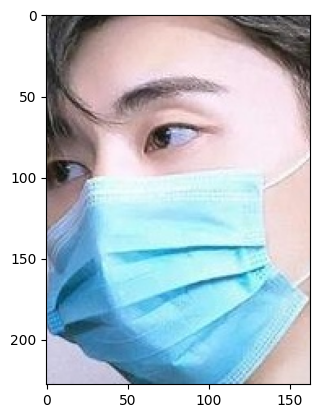

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

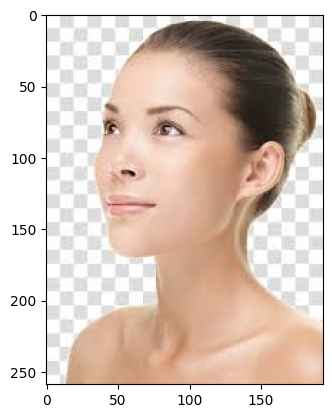

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create generator with rescaling + validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training set
train_gen = datagen.flow_from_directory(
    '/content/data',        # parent folder containing with_mask and without_mask
    target_size=(128,128),  # resize images
    batch_size=32,
    class_mode='binary',    # since you have 2 classes
    subset='training'
)

# Validation set
val_gen = datagen.flow_from_directory(
    '/content/data',
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


Building a Convolutional Neural Networks (CNN)

In [32]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

num_of_classes = 2

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
#train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - acc: 0.7254 - loss: 0.5516 - val_acc: 0.9013 - val_loss: 0.2439
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - acc: 0.8838 - loss: 0.2996 - val_acc: 0.9238 - val_loss: 0.2146
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - acc: 0.9044 - loss: 0.2404 - val_acc: 0.9185 - val_loss: 0.2186
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - acc: 0.9111 - loss: 0.2135 - val_acc: 0.9397 - val_loss: 0.1864
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - acc: 0.9355 - loss: 0.1638 - val_acc: 0.9424 - val_loss: 0.1816


In [36]:
#evaluation of model
val_loss, val_acc = model.evaluate(val_gen)
print("Validation Accuracy:", val_acc)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.9478 - loss: 0.1697
Validation Accuracy: 0.9423841238021851


PREDICTIVE SYSTEM


Saving with_mask_9.jpg to with_mask_9.jpg
Uploaded file: with_mask_9.jpg


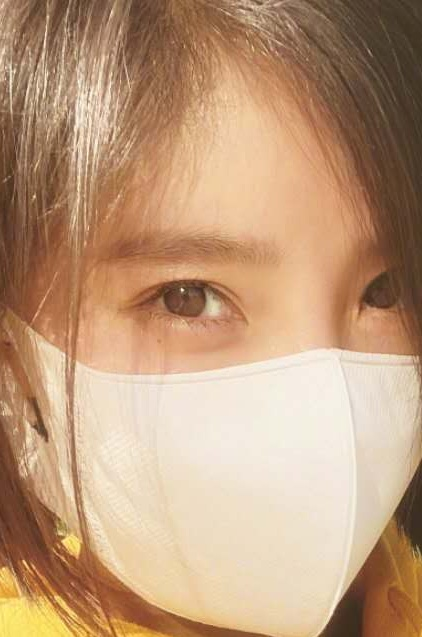

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
Raw prediction (sigmoid output): 0.5689243
The person in the image is wearing a mask


In [41]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Step 1: Upload image
uploaded = files.upload()  # Opens file chooser

# Step 2: Get the uploaded file path
input_image_path = list(uploaded.keys())[0]
print("Uploaded file:", input_image_path)

# Step 3: Read and display the image
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

# Step 4: Preprocess the image
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized.astype('float32') / 255.0
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

# Step 5: Predict using the model
input_prediction = model.predict(input_image_reshaped)
print("Raw prediction (sigmoid output):", input_prediction[0][0])

# Step 6: Convert prediction to label using threshold 0.5
input_pred_label = 1 if input_prediction[0][0] > 0.5 else 0

# Step 7: Print result
if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')
